In [135]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
from autogluon.tabular import TabularPredictor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#평가결과리스트
all_accuracy = []
all_f1_score = []

# 데이터 불러오기

In [137]:
df = pd.read_csv("C:/Users/user/Desktop/SKN12-2nd-4TEAM/data/gym_churn_us.csv")
df = df.rename(columns={"Churn": "target"})
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()

컬럼명 | 설명

gender | 성별 

Near_Location | 사용자가 헬스장 근처에 거주/근무 여부

Partner | 제휴사 직원 여부

Promo_friends | 친구 추천 프로모션을 통해 가입했는지 여부

Phone | 전화번호를 제공했는지 여부

Contract_period | 회원권 계약 기간

Group_visits | 그룹 운동 참석 여부

Age | 나이

Avg_additional_charges_total | 추가 서비스(PT, 음료 등) 총 평균 이용 금액

Month_to_end_contract | 계약이 종료되기까지 남은 개월 수

Lifetime | 첫 방문 이후 현재까지의 총 이용 개월 수

Avg_class_frequency_total | 가입 이후 지금까지 평균 클래스 이용 빈도 (주/월 기준일 수 있음)

Avg_class_frequency_current_month | 이번 달 클래스 평균 이용 빈도

# EDA 및 전처리

## 기초통계확인

In [138]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,target
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [140]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,target
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


## 이상치 확인

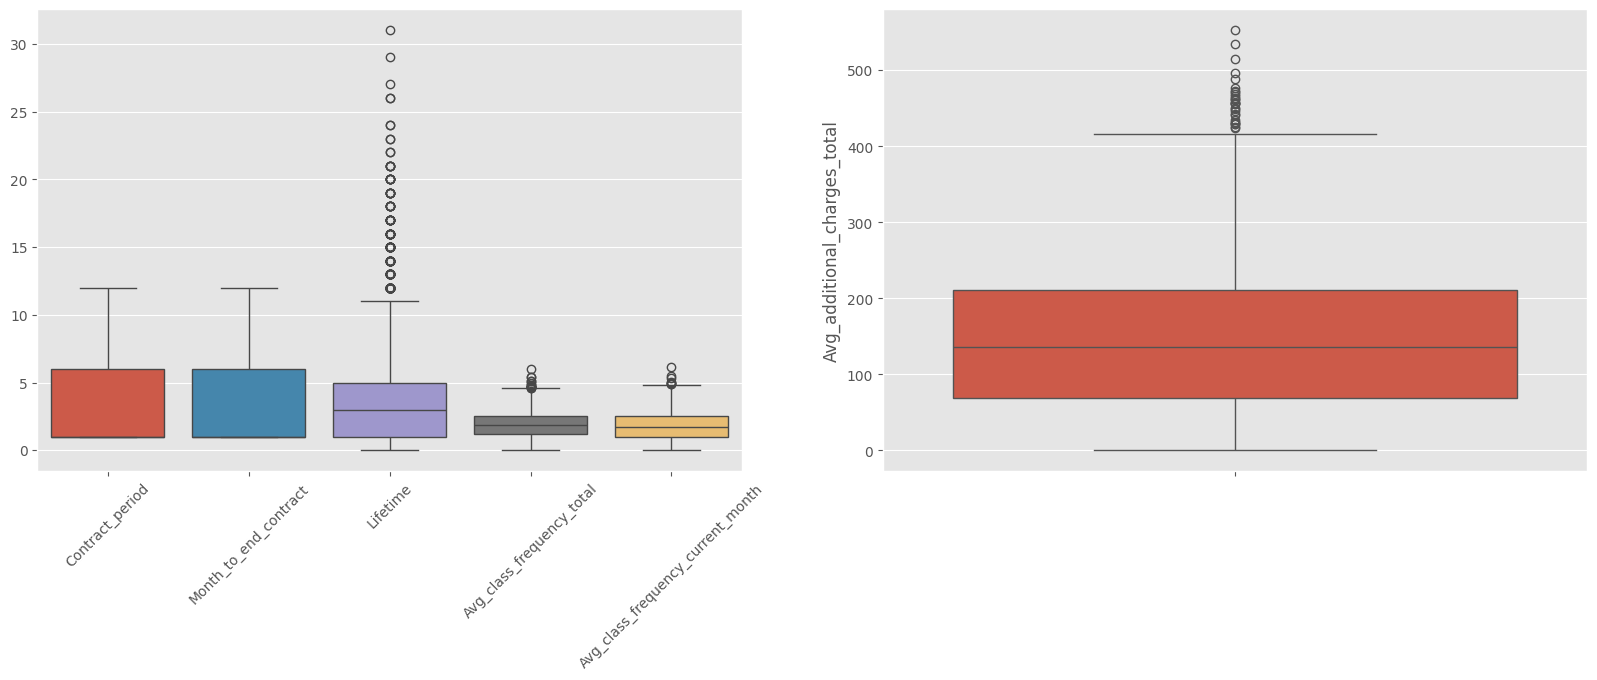

In [141]:
# 수치형 컬럼명(범주화(0 or 1)와 범위가 큰 컬럼 제외)
num_cols = ['Contract_period','Month_to_end_contract','Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month']
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(data=X[num_cols])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=X['Avg_additional_charges_total'])
plt.show()

In [142]:
def remove_outliers_iqr(df):
    df_cleaned = df.copy()
    num_cols = ['Contract_period','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month']
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

df_cleaned = remove_outliers_iqr(df)
X_cleaned = df_cleaned.iloc[:,:-1]
y_cleaned = df_cleaned.iloc[:,-1]

In [143]:
# 스케일링 할 수치형 데이터
num_features = [
    "Contract_period",
    "Age",
    "Avg_additional_charges_total",
    "Month_to_end_contract",
    "Lifetime",
    "Avg_class_frequency_total",
    "Avg_class_frequency_current_month"]

In [144]:
# 이상치 제거 O
ss = StandardScaler()
X_cleaned[num_features] = ss.fit_transform(X_cleaned[num_features])
dtc = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(dtc, X_cleaned, y_cleaned, cv=cv)
print(confusion_matrix(y_cleaned, y_pred))
print(f'f1_score : {f1_score(y_cleaned, y_pred)}')
print(classification_report(y_cleaned, y_pred, digits=4))

[[2481  224]
 [ 216  844]]
f1_score : 0.793233082706767
              precision    recall  f1-score   support

           0     0.9199    0.9172    0.9185      2705
           1     0.7903    0.7962    0.7932      1060

    accuracy                         0.8831      3765
   macro avg     0.8551    0.8567    0.8559      3765
weighted avg     0.8834    0.8831    0.8833      3765



In [145]:
# 이상치 제거 X
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("C:/Users/user/Desktop/SKN12-2nd-4TEAM/data/gym_churn_us.csv")
df = df.rename(columns={"Churn": "target"})
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

ss = StandardScaler()
X[num_features] = ss.fit_transform(X[num_features])
dtc = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(dtc, X, y, cv=cv)
print(confusion_matrix(y, y_pred))
print(f'f1_score : {f1_score(y, y_pred)}')
print(classification_report(y,y_pred, digits=4))

[[2744  195]
 [ 219  842]]
f1_score : 0.8026692087702574
              precision    recall  f1-score   support

           0     0.9261    0.9337    0.9299      2939
           1     0.8120    0.7936    0.8027      1061

    accuracy                         0.8965      4000
   macro avg     0.8690    0.8636    0.8663      4000
weighted avg     0.8958    0.8965    0.8961      4000



이상치를 제거하면 이탈(1)에 대한 재현률(recall)이 소폭 상승하지만 종합적인 평가는 이상치를 제거하지 않는 편이 좋기 때문에 이상치를 제거하지 않음

## 변수간 상관관계 확인

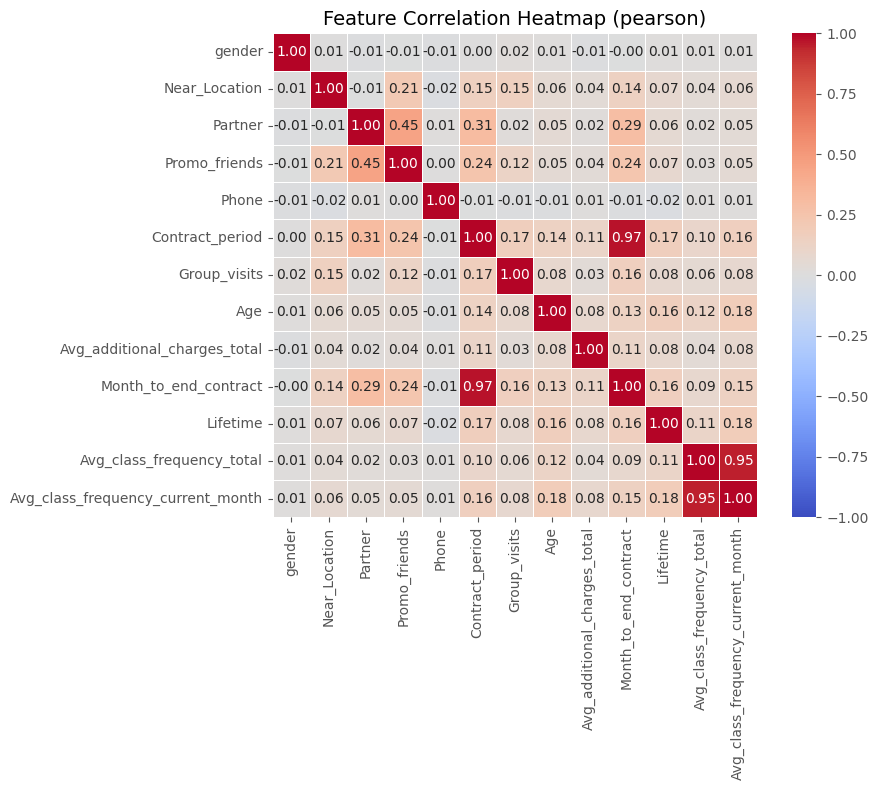

In [146]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    X.corr(method='pearson'),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    square=True
)
plt.title("Feature Correlation Heatmap (pearson)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

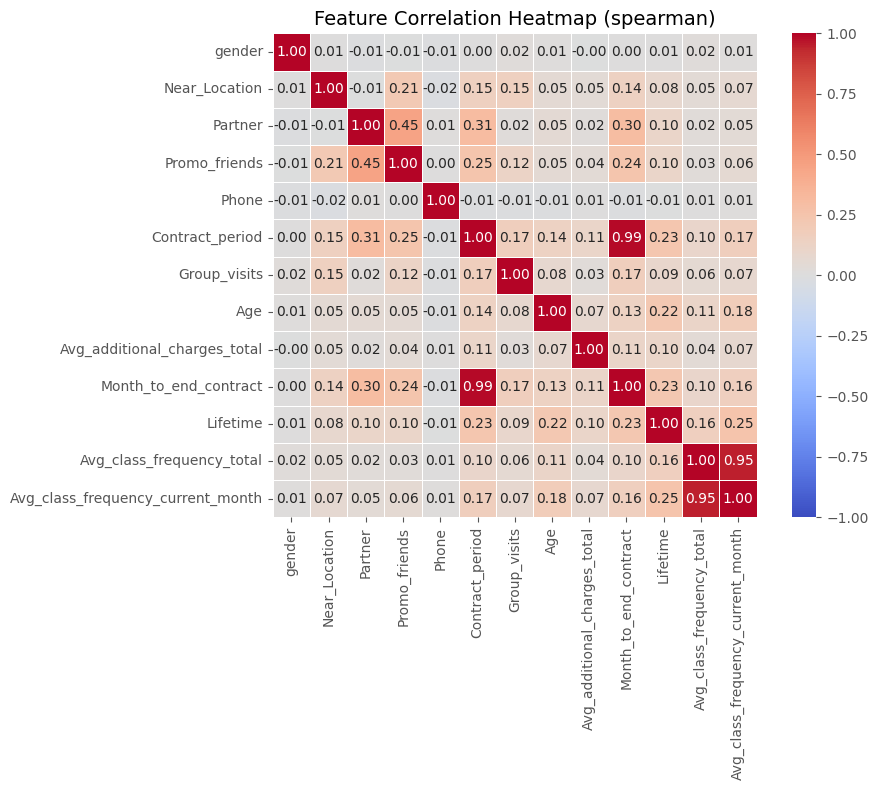

In [147]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    X.corr(method='spearman'),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    square=True
)
plt.title("Feature Correlation Heatmap (spearman)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

변수 간의 상관관계가 너무 높아 다중공선성 발생 위험 존재

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(X):
    X = add_constant(X)
    vif = pd.DataFrame()
    vif["variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif
calculate_vif(X)

,variable,VIF
0,const,18.987596
1,gender,1.001559
2,Near_Location,1.097184
3,Partner,1.357594
4,Promo_friends,1.353862
5,Phone,1.002261
6,Contract_period,19.184679
7,Group_visits,1.060933
8,Age,1.091845
9,Avg_additional_charges_total,1.028735


변수 간의 VIF가 10이상인 변수가 존재하므로 다중공선성 발생

차원축소 or 변수 제거 작업 필요

### 차원축소 후 선형 모델 학습

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=10)    # 차원축소 사용시 10차원일 때 성능이 제일 좋음
X_pca = pca.fit_transform(X_scaled)
model = LogisticRegression(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X_pca, y, cv=cv)
print(confusion_matrix(y, y_pred))
print(f'f1_score : {f1_score(y, y_pred)}')
print(classification_report(y,y_pred, digits=4))

[[2764  175]
 [ 186  875]]
f1_score : 0.8289909995262909
              precision    recall  f1-score   support

           0     0.9369    0.9405    0.9387      2939
           1     0.8333    0.8247    0.8290      1061

    accuracy                         0.9097      4000
   macro avg     0.8851    0.8826    0.8838      4000
weighted avg     0.9095    0.9097    0.9096      4000



In [150]:
from sklearn.svm import SVC

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=10)     # 차원축소 사용시 10차원일 때 성능이 제일 좋음
X_pca = pca.fit_transform(X_scaled)

# svc = SVC(kernel='linear', class_weight='balanced')
svc = SVC(kernel='linear',random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(svc, X_pca, y, cv=cv)
print(confusion_matrix(y, y_pred))
print(f'f1_score : {f1_score(y, y_pred)}')
print(classification_report(y,y_pred, digits=4))

[[2761  178]
 [ 183  878]]
f1_score : 0.8294756731223429
              precision    recall  f1-score   support

           0     0.9378    0.9394    0.9386      2939
           1     0.8314    0.8275    0.8295      1061

    accuracy                         0.9097      4000
   macro avg     0.8846    0.8835    0.8841      4000
weighted avg     0.9096    0.9097    0.9097      4000



### 트리기반 모델 학습

In [151]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("C:/Users/user/Desktop/SKN12-2nd-4TEAM/data/gym_churn_us.csv")
df = df.rename(columns={"Churn": "target"})
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
ss = StandardScaler()
X[num_features] = ss.fit_transform(X[num_features])
rfc = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(rfc, X, y, cv=cv)
print(confusion_matrix(y, y_pred))
print(f'f1_score : {f1_score(y, y_pred)}')
print(classification_report(y,y_pred, digits=4))

[[2815  124]
 [ 201  860]]
f1_score : 0.8410757946210269
              precision    recall  f1-score   support

           0     0.9334    0.9578    0.9454      2939
           1     0.8740    0.8106    0.8411      1061

    accuracy                         0.9187      4000
   macro avg     0.9037    0.8842    0.8932      4000
weighted avg     0.9176    0.9187    0.9177      4000



In [152]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(xgb, X, y, cv=cv)
print(confusion_matrix(y, y_pred))
print(f'f1_score : {f1_score(y, y_pred)}')
print(classification_report(y,y_pred, digits=4))

[[2846   93]
 [ 148  913]]
f1_score : 0.8834059022738268
              precision    recall  f1-score   support

           0     0.9506    0.9684    0.9594      2939
           1     0.9076    0.8605    0.8834      1061

    accuracy                         0.9397      4000
   macro avg     0.9291    0.9144    0.9214      4000
weighted avg     0.9392    0.9397    0.9392      4000



차원축소를 통해 다중공선성을 없앤 선형모델보다 다중공선성에 영향이 거의없는 트리기반 모델이 성능이 좋게 나오므로 변수를 그대로 사용

## 파생변수 생성

In [114]:
X['social_connected'] = X['Partner'] + X['Promo_friends'] + X['Group_visits']   # 고객의 사회적 연결이 얼마나 되어있는지 나타내는 피쳐
X['avg_monthly_add_charge'] = X['Avg_additional_charges_total'] / (X['Lifetime'] + 1)   # 평균 추가 요금의 시간 기준 비율
X['class_freq_ratio'] = X['Avg_class_frequency_current_month'] / (X['Avg_class_frequency_total'] + 1e-5)    # 클래스 이용 변화율 (최근 대비 전체)
X['class_freq_change'] = X['Avg_class_frequency_current_month'] - X['Avg_class_frequency_total']    # 이용 행동 변화량
X['contract_ending_soon'] = (X['Month_to_end_contract'] <= 1).astype(int)      # 계약 만료 임박 여부 (1개월 이내)
X['social_connected_ratio'] = (X['Partner'] + X['Promo_friends'] + X['Group_visits']) / 3     # 사회적 연결의 강도 비율

## 데이터 불균형

target
0         2939
1         1061
Name: count, dtype: int64


array([[<Axes: title={'center': 'target'}>]], dtype=object)

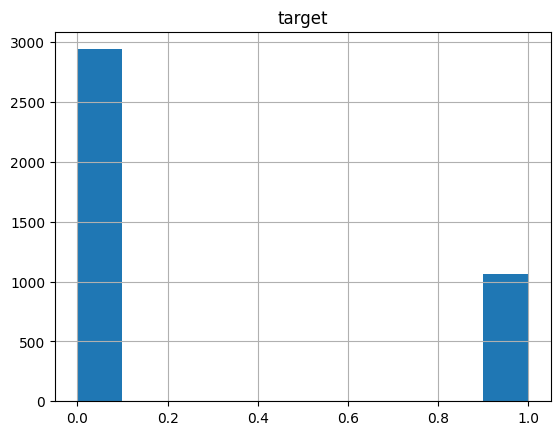

In [115]:
print(pd.DataFrame(y).value_counts())
pd.DataFrame(y).hist()

In [116]:
# 파생변수생성 + Smote미적용
from sklearn.tree import DecisionTreeClassifier

num_features = [
    "Contract_period",
    "Age",
    "Avg_additional_charges_total",
    "Month_to_end_contract",
    "Lifetime",
    "Avg_class_frequency_total",
    "Avg_class_frequency_current_month",
    "social_connected",
    "avg_monthly_add_charge",
    "class_freq_ratio"]

df = pd.read_csv("C:/Users/user/Desktop/SKN12-2nd-4TEAM/data/gym_churn_us.csv")
df = df.rename(columns={"Churn": "target"})
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X['social_connected'] = X['Partner'] + X['Promo_friends'] + X['Group_visits']   # 고객의 사회적 연결이 얼마나 되어있는지 나타내는 피쳐
X['avg_monthly_add_charge'] = X['Avg_additional_charges_total'] / (X['Lifetime'] + 1)   # 평균 추가 요금의 시간 기준 비율
X['class_freq_ratio'] = X['Avg_class_frequency_current_month'] / (X['Avg_class_frequency_total'] + 1e-5)    # 클래스 이용 변화율 (최근 대비 전체)
X['class_freq_change'] = X['Avg_class_frequency_current_month'] - X['Avg_class_frequency_total']    # 이용 행동 변화량
X['contract_ending_soon'] = (X['Month_to_end_contract'] <= 1).astype(int)      # 계약 만료 임박 여부 (1개월 이내)
X['social_connected_ratio'] = (X['Partner'] + X['Promo_friends'] + X['Group_visits']) / 3     # 사회적 연결의 강도 비율

ss = StandardScaler()
X[num_features] = ss.fit_transform(X[num_features])
dtc = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(dtc, X, y, cv=cv)
f1 = f1_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
all_accuracy.append(accuracy)
all_f1_score.append(f1)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y,y_pred, digits=4))

Accuracy: 0.9265
F1 Score: 0.8625
              precision    recall  f1-score   support

           0     0.9524    0.9473    0.9498      2939
           1     0.8561    0.8690    0.8625      1061

    accuracy                         0.9265      4000
   macro avg     0.9043    0.9081    0.9062      4000
weighted avg     0.9269    0.9265    0.9267      4000



In [117]:
# SMOTE 적용
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


y_pred = cross_val_predict(pipeline, X[num_features], y, cv=cv)
f1 = f1_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y,y_pred, digits=4))

Accuracy: 0.9215
F1 Score: 0.8554
              precision    recall  f1-score   support

           0     0.9543    0.9381    0.9461      2939
           1     0.8362    0.8756    0.8554      1061

    accuracy                         0.9215      4000
   macro avg     0.8952    0.9068    0.9008      4000
weighted avg     0.9230    0.9215    0.9221      4000



SMOTE를 사용하여 오버샘플링을 하면 이탈(1)에 대한 재현률(recall)이 소폭 상승하지만 종합적인 평가는 SMOTE를 사용하지 않는 편이 좋기 때문에 오버샘플링을 하지 않음

# 모델 학습

In [118]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline

# 이진 분류 모델들
models = {
    'Logistic Regression' : LogisticRegression(random_state=42),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'XGBoost' : XGBClassifier(random_state=42),
    'LightGBM' : LGBMClassifier(random_state=42),
    'CatBoostClassifier' : CatBoostClassifier(logging_level='Silent',random_state=42)
}

# 교차검증 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 결과 저장
results = {}

for name, model in models.items():
    print(f"\n Model: {name}")
    
    # 파이프라인 구성
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    # 교차검증 예측
    y_pred = cross_val_predict(pipeline, X[num_features], y, cv=cv)
    
    # 분류 리포트 출력 및 저장
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    all_accuracy.append(accuracy)
    all_f1_score.append(f1)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y,y_pred, digits=4))


 Model: Logistic Regression
Accuracy: 0.9180
F1 Score: 0.8549
              precision    recall  f1-score   support

           0     0.9661    0.9207    0.9429      2939
           1     0.8057    0.9105    0.8549      1061

    accuracy                         0.9180      4000
   macro avg     0.8859    0.9156    0.8989      4000
weighted avg     0.9235    0.9180    0.9195      4000


 Model: Random Forest
Accuracy: 0.9453
F1 Score: 0.8971
              precision    recall  f1-score   support

           0     0.9638    0.9616    0.9627      2939
           1     0.8942    0.9001    0.8971      1061

    accuracy                         0.9453      4000
   macro avg     0.9290    0.9308    0.9299      4000
weighted avg     0.9454    0.9453    0.9453      4000


 Model: XGBoost
Accuracy: 0.9490
F1 Score: 0.9037
              precision    recall  f1-score   support

           0     0.9647    0.9660    0.9653      2939
           1     0.9054    0.9020    0.9037      1061

    accurac

CatBoostClassifier가 가장 좋은 성능을 보임

# GridSearch

In [119]:
from sklearn.model_selection import GridSearchCV

# 기본 모델
model = CatBoostClassifier(
    verbose=0,  # 출력 없애기 (GridSearch 중 깔끔하게)
    random_state=42
)

# 추천 그리드서치 파라미터
param_grid = {
    'iterations': [100, 300, 500],       # 반복 횟수
    'depth': [4, 6, 8],                  # 트리 깊이
    'learning_rate': [0.01, 0.05, 0.1],  # 학습률
    'l2_leaf_reg': [1, 3, 5, 7],         # L2 정규화
    'border_count': [32, 64, 128]        # float feature 이진 분할 개수
}

# 그리드서치 세팅
grid_search = GridSearchCV(
    CatBoostClassifier(verbose=0, random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)

grid_search.fit(X, y)

print("최적 파라미터:", grid_search.best_params_)
print("최고 F1 점수:", grid_search.best_score_)

최적 파라미터: {'border_count': 128, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
최고 F1 점수: 0.9200506089674049


In [120]:
df = pd.read_csv("C:/Users/user/Desktop/SKN12-2nd-4TEAM/data/gym_churn_us.csv")
df = df.rename(columns={"Churn": "target"})
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X['social_connected'] = X['Partner'] + X['Promo_friends'] + X['Group_visits']   # 고객의 사회적 연결이 얼마나 되어있는지 나타내는 피쳐
X['avg_monthly_add_charge'] = X['Avg_additional_charges_total'] / (X['Lifetime'] + 1)   # 평균 추가 요금의 시간 기준 비율
X['class_freq_ratio'] = X['Avg_class_frequency_current_month'] / (X['Avg_class_frequency_total'] + 1e-5)    # 클래스 이용 변화율 (최근 대비 전체)
X['class_freq_change'] = X['Avg_class_frequency_current_month'] - X['Avg_class_frequency_total']    # 이용 행동 변화량
X['contract_ending_soon'] = (X['Month_to_end_contract'] <= 1).astype(int)      # 계약 만료 임박 여부 (1개월 이내)
X['social_connected_ratio'] = (X['Partner'] + X['Promo_friends'] + X['Group_visits']) / 3     # 사회적 연결의 강도 비율

ss = StandardScaler()
X[num_features] = ss.fit_transform(X[num_features])
best_params = grid_search.best_params_
best_model = CatBoostClassifier(
    **best_params,
    verbose=0,
    random_state=42
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(best_model, X, y, cv=cv)
f1 = f1_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
all_accuracy.append(accuracy)
all_f1_score.append(f1)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y,y_pred, digits=4))

Accuracy: 0.9585
F1 Score: 0.9200
              precision    recall  f1-score   support

           0     0.9645    0.9796    0.9720      2939
           1     0.9409    0.9001    0.9200      1061

    accuracy                         0.9585      4000
   macro avg     0.9527    0.9398    0.9460      4000
weighted avg     0.9582    0.9585    0.9582      4000



# automl

In [121]:
# 각 모델 1번씩 피트
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.metrics import classification_report

# 데이터 로딩 및 피처 엔지니어링
df = pd.read_csv("C:/Users/user/Desktop/SKN12-2nd-4TEAM/data/gym_churn_us.csv")
df = df.rename(columns={"Churn": "target"})
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 추가 피처 생성
X['social_connected'] = X['Partner'] + X['Promo_friends'] + X['Group_visits']
X['avg_monthly_add_charge'] = X['Avg_additional_charges_total'] / (X['Lifetime'] + 1)
X['class_freq_ratio'] = X['Avg_class_frequency_current_month'] / (X['Avg_class_frequency_total'] + 1e-5)
X['class_freq_change'] = X['Avg_class_frequency_current_month'] - X['Avg_class_frequency_total']
X['contract_ending_soon'] = (X['Month_to_end_contract'] <= 1).astype(int)
X['social_connected_ratio'] = (X['Partner'] + X['Promo_friends'] + X['Group_visits']) / 3

# 최종 데이터 통합
data = X.copy()
data['target'] = y

# 훈련/검증 데이터 분리
train_data, val_data = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=42)

# SMOTE 적용
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 재조합
train_resampled = X_resampled.copy()
train_resampled['target'] = y_resampled

# AutoGluon 학습
time_limit = 60 * 10  # 10분
eval_metric = 'f1_weighted'

predictor = TabularPredictor(label='target', path='AutogluonModels/', eval_metric=eval_metric)
predictor.fit(train_resampled, time_limit=time_limit)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Memory Avail:       17.94 GB / 31.91 GB (56.2%)
Disk Space Avail:   170.67 GB / 465.12 GB (36.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference speed.
	presets='good'         : Good accu

In [122]:
leaderboard = predictor.leaderboard(silent=True)
leaderboard

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.965999,f1_weighted,0.003000,1.418386,0.003000,1.418386,1,True,11
1,WeightedEnsemble_L2,0.965999,f1_weighted,0.004001,1.661442,0.001000,0.243056,2,True,14
2,LightGBMLarge,0.964000,f1_weighted,0.005001,2.318556,0.005001,2.318556,1,True,13
3,LightGBM,0.960000,f1_weighted,0.005001,2.015453,0.005001,2.015453,1,True,4
4,NeuralNetFastAI,0.960000,f1_weighted,0.006002,2.729637,0.006002,2.729637,1,True,10
5,CatBoost,0.958000,f1_weighted,0.001001,1.551347,0.001001,1.551347,1,True,7
6,LightGBMXT,0.958000,f1_weighted,0.004001,1.503357,0.004001,1.503357,1,True,3
7,NeuralNetTorch,0.957996,f1_weighted,0.007001,9.742332,0.007001,9.742332,1,True,12
8,RandomForestGini,0.952000,f1_weighted,0.039209,0.491616,0.039209,0.491616,1,True,5
9,RandomForestEntr,0.951999,f1_weighted,0.041010,0.467682,0.041010,0.467682,1,True,6


In [123]:
X_val = val_data.drop(columns=['target'])
y_val = val_data['target']

y_pred = predictor.predict(X_val)
f1 = f1_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
all_accuracy.append(accuracy)
all_f1_score.append(f1)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9575
F1 Score: 0.9190


In [124]:
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_val,y_pred, digits=4))

Accuracy: 0.9575
F1 Score: 0.9190
              precision    recall  f1-score   support

           0     0.9679    0.9745    0.9712       588
           1     0.9279    0.9104    0.9190       212

    accuracy                         0.9575       800
   macro avg     0.9479    0.9424    0.9451       800
weighted avg     0.9573    0.9575    0.9574       800



In [125]:
# num_bag_folds=5
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.metrics import classification_report

# 데이터 로딩 및 피처 엔지니어링
df = pd.read_csv("C:/Users/user/Desktop/SKN12-2nd-4TEAM/data/gym_churn_us.csv")
df = df.rename(columns={"Churn": "target"})
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 추가 피처 생성
X['social_connected'] = X['Partner'] + X['Promo_friends'] + X['Group_visits']
X['avg_monthly_add_charge'] = X['Avg_additional_charges_total'] / (X['Lifetime'] + 1)
X['class_freq_ratio'] = X['Avg_class_frequency_current_month'] / (X['Avg_class_frequency_total'] + 1e-5)
X['class_freq_change'] = X['Avg_class_frequency_current_month'] - X['Avg_class_frequency_total']
X['contract_ending_soon'] = (X['Month_to_end_contract'] <= 1).astype(int)
X['social_connected_ratio'] = (X['Partner'] + X['Promo_friends'] + X['Group_visits']) / 3

# 최종 데이터 통합
data = X.copy()
data['target'] = y

# 훈련/검증 데이터 분리
train_data, val_data = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=42)

# AutoGluon 학습
time_limit = 60 * 10  # 10분
eval_metric = 'f1_weighted'

predictor = TabularPredictor(label='target', path='AutogluonModels/', eval_metric=eval_metric)
predictor.fit(train_data, time_limit=time_limit,  num_bag_folds=5, num_bag_sets=1)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Memory Avail:       18.08 GB / 31.91 GB (56.7%)
Disk Space Avail:   170.67 GB / 465.12 GB (36.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference speed.
	presets='good'         : Good accu

In [126]:
leaderboard = predictor.leaderboard(silent=True)
leaderboard

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.962574,f1_weighted,0.485626,24.400219,0.001000,0.491127,2,True,14
1,NeuralNetTorch_BAG_L1,0.957163,f1_weighted,0.041010,8.723010,0.041010,8.723010,1,True,12
2,LightGBMXT_BAG_L1,0.956736,f1_weighted,0.018005,2.860940,0.018005,2.860940,1,True,3
3,CatBoost_BAG_L1,0.956607,f1_weighted,0.008002,3.612916,0.008002,3.612916,1,True,7
4,NeuralNetFastAI_BAG_L1,0.956266,f1_weighted,0.051011,7.207648,0.051011,7.207648,1,True,10
5,XGBoost_BAG_L1,0.955780,f1_weighted,0.017004,2.884209,0.017004,2.884209,1,True,11
6,LightGBM_BAG_L1,0.954916,f1_weighted,0.014003,2.904792,0.014003,2.904792,1,True,4
7,LightGBMLarge_BAG_L1,0.953101,f1_weighted,0.024001,3.489798,0.024001,3.489798,1,True,13
8,RandomForestGini_BAG_L1,0.951338,f1_weighted,0.112025,0.486989,0.112025,0.486989,1,True,5
9,RandomForestEntr_BAG_L1,0.951276,f1_weighted,0.111025,0.459102,0.111025,0.459102,1,True,6


In [127]:
# 검증 데이터에서 feature만 따로 분리
X_val = val_data.drop(columns=['target'])
y_val = val_data['target']

# 예측
y_pred = predictor.predict(X_val)

# 결과 확인 (예: 정확도, F1 점수 등)
from sklearn.metrics import f1_score, classification_report

f1 = f1_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
all_accuracy.append(accuracy)
all_f1_score.append(f1)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_val,y_pred, digits=4))

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can exec

Accuracy: 0.9637
F1 Score: 0.9301
              precision    recall  f1-score   support

           0     0.9682    0.9830    0.9755       588
           1     0.9507    0.9104    0.9301       212

    accuracy                         0.9637       800
   macro avg     0.9595    0.9467    0.9528       800
weighted avg     0.9636    0.9637    0.9635       800



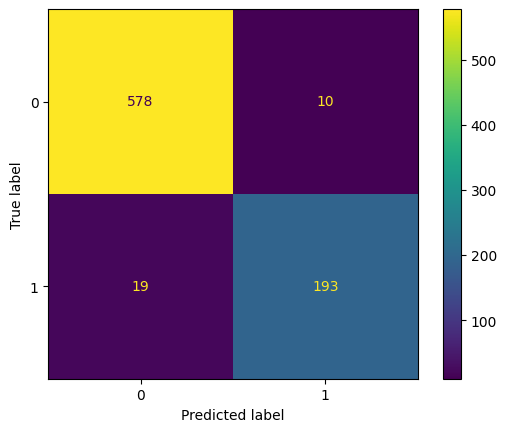

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# 정오분류표 계산
cm = confusion_matrix(y_val, y_pred)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

Computing feature importance via permutation shuffling for 19 features using 800 rows with 5 shuffle sets...
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, us

                                   importance    stddev   p_value  n  \
class_freq_change                    0.091638  0.007292  0.000005  5   
Lifetime                             0.033246  0.007972  0.000368  5   
Age                                  0.013170  0.004766  0.001742  5   
class_freq_ratio                     0.006138  0.002833  0.004186  5   
Avg_class_frequency_current_month    0.004014  0.002380  0.009800  5   

                                   p99_high   p99_low  
class_freq_change                  0.106653  0.076623  
Lifetime                           0.049661  0.016832  
Age                                0.022982  0.003357  
class_freq_ratio                   0.011970  0.000305  
Avg_class_frequency_current_month  0.008915 -0.000888  


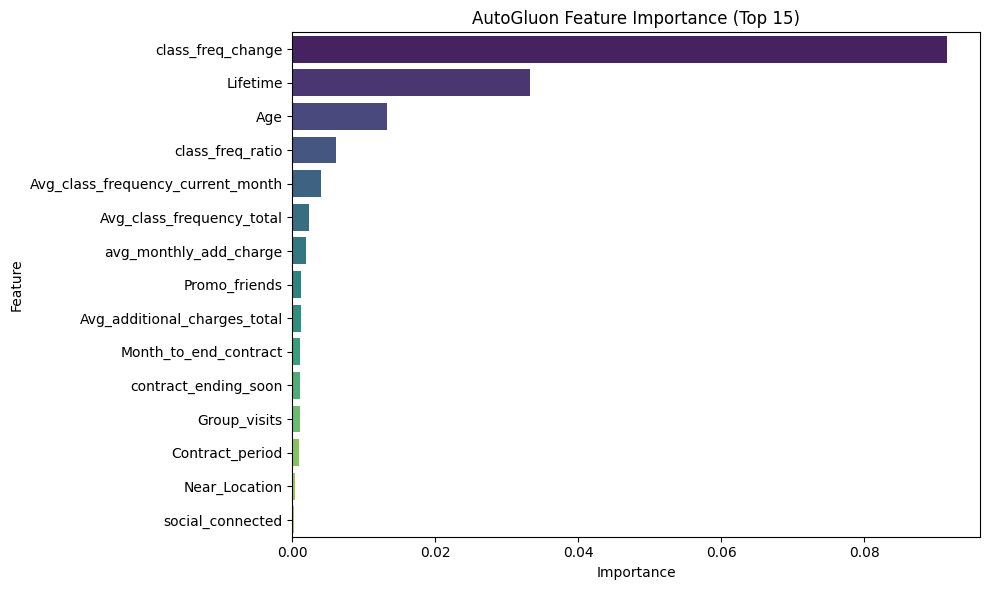

In [129]:
# AutoGluon Predictor에서 feature importance 추출
feature_importance = predictor.feature_importance(val_data)

# 중요도 상위 순으로 정렬된 DataFrame 반환됨
print(feature_importance.head())

# 시각화용 정렬
feat_imp_df = feature_importance.reset_index().rename(columns={'index': 'Feature'})

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='importance', y='Feature', palette='viridis')
plt.title('AutoGluon Feature Importance (Top 15)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [66]:
import joblib

# 모델 저장
joblib.dump(model, 'model.pkl')

# 모델 불러오기
loaded_model = joblib.load('model.pkl')

In [132]:
print(all_accuracy)
print(all_f1_score)

[0.9265, 0.918, 0.94525, 0.949, 0.94975, 0.9515, 0.9585, 0.9575, 0.96375]
[0.862488306828812, 0.8548672566371681, 0.8971348050728042, 0.9036827195467422, 0.9052333804809052, 0.9093457943925234, 0.9200385356454721, 0.919047619047619, 0.9301204819277108]


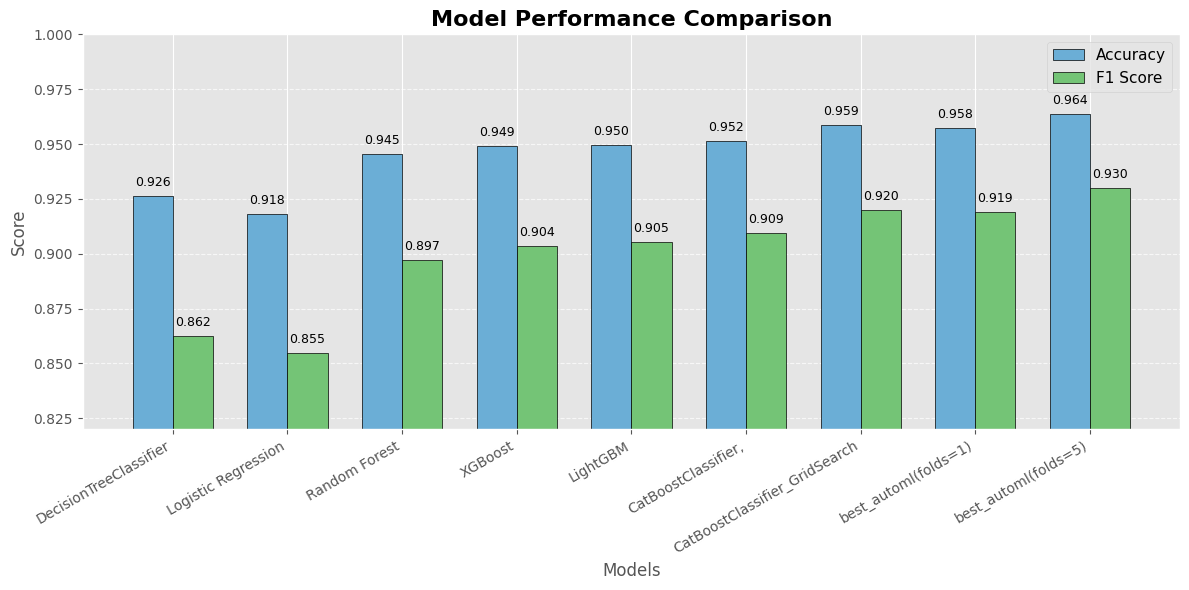

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# 스타일 적용
plt.style.use('ggplot')  # 깔끔한 스타일

# 모델 이름
models = ['DecisionTreeClassifier','Logistic Regression','Random Forest','XGBoost','LightGBM',
          'CatBoostClassifier,', 'CatBoostClassifier_GridSearch','best_automl(folds=1)','best_automl(folds=5)']

# 정확도와 F1-score
accuracy = all_accuracy
f1_scores = all_f1_score

# 위치 설정
x = np.arange(len(models))
width = 0.35

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy',
               color='#6baed6', edgecolor='black')
bars2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score',
               color='#74c476', edgecolor='black')

# y축 범위 설정
ax.set_ylim(0.82, 1.0)

# 라벨 설정
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold')
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha='right', fontsize=10)
ax.legend(fontsize=11)

# 그리드 추가
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# 막대 위에 값 표시
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.annotate(f'{yval:.3f}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

### 전체데이터

In [5]:
result_df = data.copy()
preds = predictor.predict(data)
result_df['predict'] = preds
preds_proba = predictor.predict_proba(data)
result_df['predict_proba'] = preds_proba.iloc[:,1]

labels = []
for proba in result_df['predict_proba']:
  if proba >= 0.9:
    labels += [2]
  elif 0.5 <= proba <0.9:
    labels += [1]
  else:
    labels += [0]

result_df['predict_proba'] = labels

C:\Users\Playdata\miniconda3\envs\env1\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
C:\Users\Playdata\miniconda3\envs\env1\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code w

C:\Users\Playdata\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:16:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Playdata\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:16:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Playdata\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:16:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Playdata\miniconda3\Li

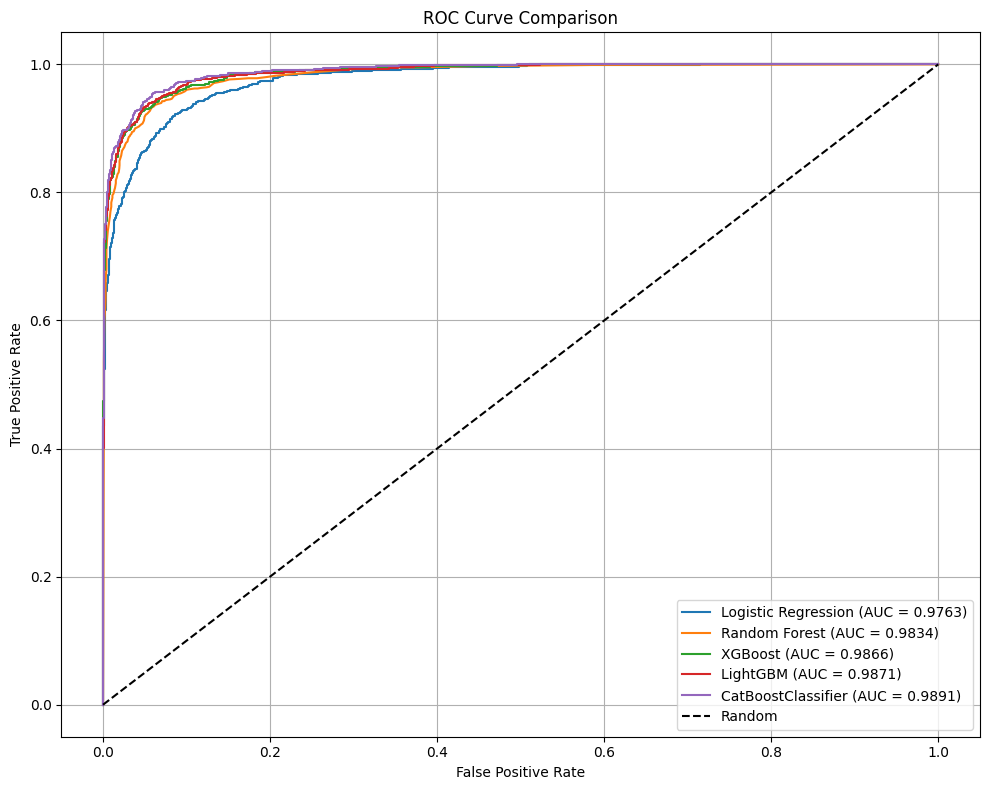

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import pandas as pd

# 데이터 로드 및 전처리 (이미 한 것들은 생략 가능)
df = pd.read_csv("C:/Users/Playdata/Desktop/project2/gym_churn_us.csv")
df = df.rename(columns={"Churn": "target"})
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X['social_connected'] = X['Partner'] + X['Promo_friends'] + X['Group_visits']
X['avg_monthly_add_charge'] = X['Avg_additional_charges_total'] / (X['Lifetime'] + 1)
X['class_freq_ratio'] = X['Avg_class_frequency_current_month'] / (X['Avg_class_frequency_total'] + 1e-5)
X['class_freq_change'] = X['Avg_class_frequency_current_month'] - X['Avg_class_frequency_total']
X['contract_ending_soon'] = (X['Month_to_end_contract'] <= 1).astype(int)
X['social_connected_ratio'] = (X['Partner'] + X['Promo_friends'] + X['Group_visits']) / 3

num_features = [
    "Contract_period",
    "Age",
    "Avg_additional_charges_total",
    "Month_to_end_contract",
    "Lifetime",
    "Avg_class_frequency_total",
    "Avg_class_frequency_current_month",
    "social_connected",
    "avg_monthly_add_charge",
    "class_freq_ratio"
]

# 모델 정의
models = {
    'Logistic Regression' : LogisticRegression(random_state=42),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'XGBoost' : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM' : LGBMClassifier(random_state=42),
    'CatBoostClassifier' : CatBoostClassifier(logging_level='Silent', random_state=42)
}

# 교차검증
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ROC 커브 그리기
plt.figure(figsize=(10, 8))
for name, model in models.items():
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    # cross_val_predict로 예측 확률 얻기
    y_proba = cross_val_predict(pipeline, X[num_features], y, cv=cv, method='predict_proba')[:, 1]
    
    # ROC 곡선과 AUC 계산
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# 시각화 설정
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

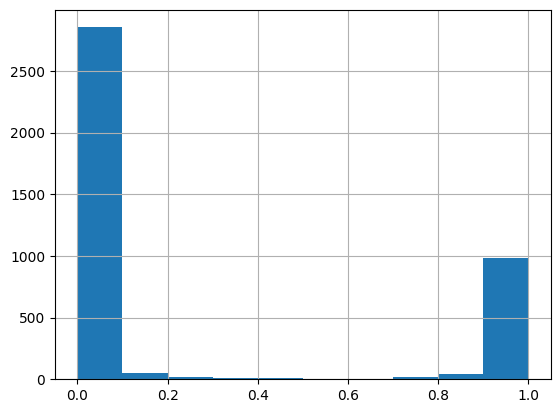

In [105]:
preds = predictor.predict_proba(data)
preds.iloc[:,1].hist()

### 테스트 데이터

In [51]:
preds = predictor.predict_proba(val_data)
labels = []
for proba in preds.iloc[:,1]:
  if proba >= 0.9:
    labels += [2]
  elif 0.5 <= proba <0.9:
    labels += [1]
  else:
    labels += [0]

In [55]:
pd.DataFrame(data = labels, columns=['lable']).value_counts().sort_index()

lable
0        595
1         41
2        164
Name: count, dtype: int64

### DB에 올릴 데이터 생성

In [ ]:
df = pd.read_csv("C:/Users/Playdata/Desktop/project2/gym_churn_us.csv")
df = df.rename(columns={"Churn": "target"})
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X['social_connected'] = X['Partner'] + X['Promo_friends'] + X['Group_visits']   # 고객의 사회적 연결이 얼마나 되어있는지 나타내는 피쳐
X['avg_monthly_add_charge'] = X['Avg_additional_charges_total'] / (X['Lifetime'] + 1)   # 평균 추가 요금의 시간 기준 비율
X['class_freq_ratio'] = X['Avg_class_frequency_current_month'] / (X['Avg_class_frequency_total'] + 1e-5)    # 클래스 이용 변화율 (최근 대비 전체)
X['class_freq_change'] = X['Avg_class_frequency_current_month'] - X['Avg_class_frequency_total']    # 이용 행동 변화량
X['contract_ending_soon'] = (X['Month_to_end_contract'] <= 1).astype(int)      # 계약 만료 임박 여부 (1개월 이내)
X['social_connected_ratio'] = (X['Partner'] + X['Promo_friends'] + X['Group_visits']) / 3     # 사회적 연결의 강도 비율

In [14]:
result_df = X.copy()
result_df['target'] = y
preds = predictor.predict(data)
result_df['predict'] = preds
preds_proba = predictor.predict_proba(data)
result_df['predict_proba'] = preds_proba.iloc[:,1]

labels = []
for proba in result_df['predict_proba']:
  if proba >= 0.9:
    labels += [2]
  elif 0.5 <= proba <0.9:
    labels += [1]
  else:
    labels += [0]

result_df['risk_label'] = labels

C:\Users\Playdata\miniconda3\envs\env1\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
C:\Users\Playdata\miniconda3\envs\env1\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code w

In [15]:
result_df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,...,social_connected,avg_monthly_add_charge,class_freq_ratio,class_freq_change,contract_ending_soon,social_connected_ratio,target,predict,predict_proba,risk_label
0,1,1,1,1,0,6,1,29,14.227470,5.0,...,3,3.556868,0.000000,-0.020398,0,1.000000,0,0,0.039583,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,...,1,14.150367,0.993394,-0.012693,0,0.333333,0,0,0.003928,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,...,1,43.149493,0.934051,-0.122596,1,0.333333,0,0,0.278890,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,...,3,20.889954,1.047283,0.151582,0,1.000000,0,0,0.004336,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,...,2,49.590566,1.005551,0.006194,1,0.666667,0,0,0.067944,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,...,1,0.267336,1.028261,0.064572,0,0.333333,0,0,0.003992,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,...,1,34.441882,0.229301,-0.984309,1,0.333333,1,1,0.989941,2
3997,1,1,1,1,1,12,0,28,78.250542,11.0,...,2,26.083514,1.016253,0.045293,0,0.666667,0,0,0.004363,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,...,2,15.478164,0.979215,-0.033872,0,0.666667,0,0,0.007605,0


In [16]:
result_df.to_csv('project2_db_data.csv', index=False)